# Simple regression with TensorFlow

Progressive example working through various network set ups

https://towardsdatascience.com/training-neural-networks-for-price-prediction-with-tensorflow-8aafe0c55198

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.1


In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [4]:
X = np.load("./rbfs/phi_reduce.npy")
y = np.load("./rbfs/y.npy")
#X = y

In [5]:
y.min()

0.0

(array([291., 137., 193., 177., 213., 311., 405., 588., 304.,  50.]),
 array([0.    , 0.0044, 0.0088, 0.0132, 0.0176, 0.022 , 0.0264, 0.0308,
        0.0352, 0.0396, 0.044 ]),
 <BarContainer object of 10 artists>)

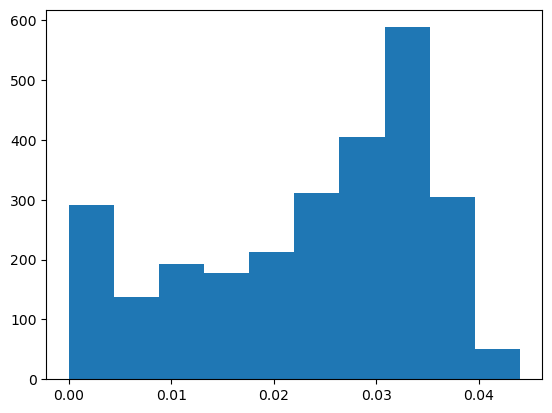

In [6]:
plt.hist(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8, random_state=42)

## TensorFlow

In [8]:
# Set random seed
tf.random.set_seed(42)
from keras import Sequential
from keras import models
from keras import layers

In [9]:
#n_feat = X_train.shape[1]

### Model 1 (Simple TF regression)

In [10]:
model = models.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='linear')
], name="Initial_model")
#model.summary()

In [11]:
# Compile the model
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [12]:
history=model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, 
                  batch_size=1024, verbose=1, 
                  validation_split=0.2)
# history=model.fit(X_train, y_train, epochs=100, 
#                   batch_size=1024, verbose=1, 
#                   validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 0s 83ms/step - loss: 0.0160 - mae: 0.0160 - mse: 3.2250e-04 - val_loss: 0.0123 - val_mae: 0.0123 - val_mse: 1.9671e-04
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 0.0117 - mae: 0.0117 - mse: 1.7901e-04 - val_loss: 0.0091 - val_mae: 0.0091 - val_mse: 1.0400e-04
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 0.0086 - mae: 0.0086 - mse: 9.3593e-05 - val_loss: 0.0070 - val_mae: 0.0070 - val_mse: 6.4579e-05
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 0.0067 - mae: 0.0067 - mse: 6.1319e-05 - val_loss: 0.0064 - val_mae: 0.0064 - val_mse: 7.1078e-05
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0065 - mae: 0.0065 - mse: 7.2538e-05 - val_loss: 0.0076 - val_mae: 0.0076 - val_mse: 1.0084e-04
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0075 - mae: 0.0075 - mse: 9.9193e-05 - val_loss: 0.0082 - val_mae: 0.0082 - 

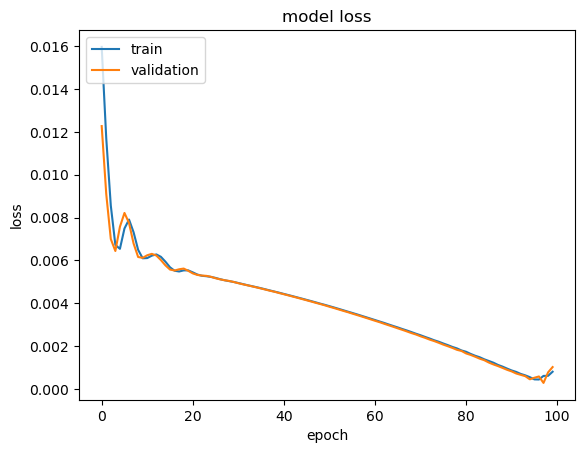

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
y_test_pred = model.predict(X_test)
mean_absolute_error(y_test, y_test_pred)

17/17 [==============================] - 0s 303us/step


0.0010274589806598916

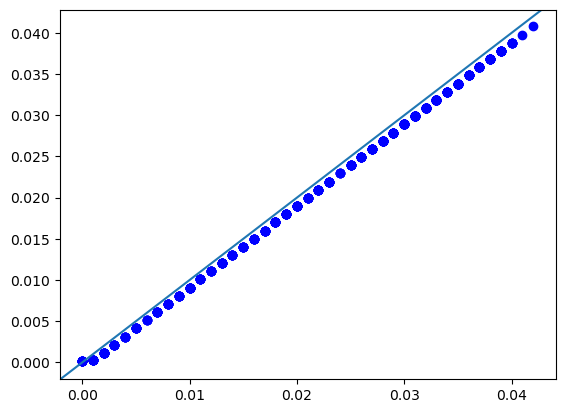

In [15]:
plt.plot(y_test, y_test_pred, 'bo')
plt.axline((0,0), slope = 1)
plt.show()